### writes 'coords'  for open boundary case
-  Differences:  regular grid, no wall

file format:  
-  npt, ne  (number of points, number of edges)
-  for i in npt:  x(i), y(i), z(i)   
-  loop over cells (j,k):  
     write node numbers surrounding cell, counterclockwise from lower left

In [28]:
%matplotlib inline

In [29]:
import matplotlib.pylab as plt
import numpy as np
import scipy as sp

In [30]:
ncol = 94
nrow = 63

In [31]:
npt = (ncol+1)*(nrow+1)
ne = nrow*ncol

In [68]:
N = sp.randn(nrow+1)/10.
from  scipy.ndimage.filters import gaussian_filter
gz =  gaussian_filter(N, 5, order=1, output=None, cval=0.0, truncate=20.0)
gz = gz + np.linspace(0, 0.3, nrow+1)

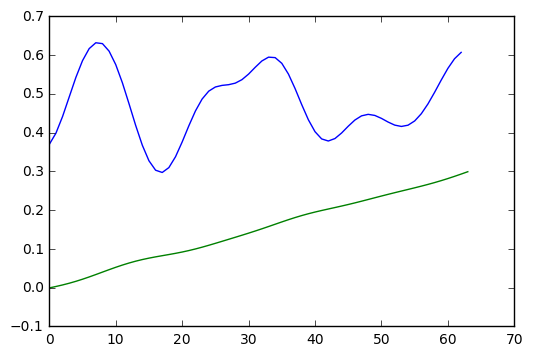

In [77]:
plt.plot((gz[1:] - gz[:-1])*100)
plt.plot(gz)

In [70]:
nbcell = ncol*2+nrow*2 -4
xdum = np.arange(10.125, 199.125, 2 )
ydum = np.arange(9, 137, 2)
ydum, xdum = np.meshgrid(ydum, xdum)

# equivalent  
# xdum = np.arange(10.125, 199.125, 2 )
# xdum = xdum.repeat(nrow+1).reshape([ncol+1, nrow+1])
# ydum = np.arange(9, 137, 2)
# ydum = np.tile(ydum, [ncol+1]).reshape([ncol+1, nrow+1])



zdum = np.tile(gz, [ncol+1]).reshape([ncol+1, nrow+1])

x = np.zeros(npt + 1)
y = np.zeros(npt + 1)
z = np.zeros(npt + 1)
x[1:] = xdum.ravel()
y[1:] = ydum.ravel()
z[1:] = zdum.ravel()

In [71]:
(max(z) - min(z))/(max(y) - min(y))*100

0.22214726683532959

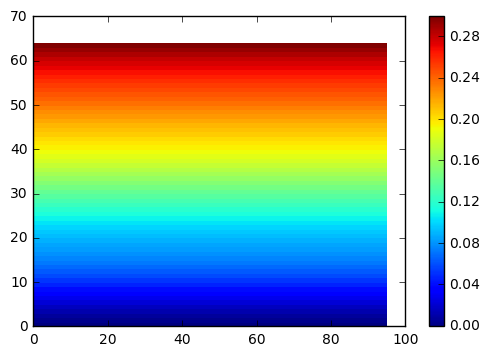

In [72]:
plt.pcolor(zdum.T)
plt.colorbar()

In [73]:
nodes = np.arange(1, npt+1, dtype = int).reshape([ncol+1, nrow+1])
# (ncol+1) by (nrow+1)  -  node numbers

In [74]:
nop = np.zeros([ncol+1, nrow+1, 4], dtype = int)
for j in range(ncol):
    for k in range(nrow):
        nop[j+1, k+1] =  nodes[j,k], nodes[j+1, k], nodes[j+1,k+1], nodes[j,k+1]

In [75]:
# dry_py.f needs an input file.  this file creates it.
f = open('coords', 'w')
f.write('{0:<13}   {1:<13}\n'.format(npt, ne))

# write x, y, z
for n in range(1, npt+1):
    f.write('{0:<13.6f} {1:<13.6f} {2:<13.6f}\n'.format(x[n],y[n],z[n])) 
    
# write node numbers  
for j in range(1, ncol+1):
    for k in range(1, nrow+1):
        n1 = nop[j, k, 0] 
        n2 = nop[j, k, 1]       
        n3 = nop[j, k, 2]        
        n4 = nop[j, k, 3] 
        f.write('{0:<10} {1:<10}  {2:<10} {3:<10}\n'.format(n1, n2, n3, n4)) 
f.close()

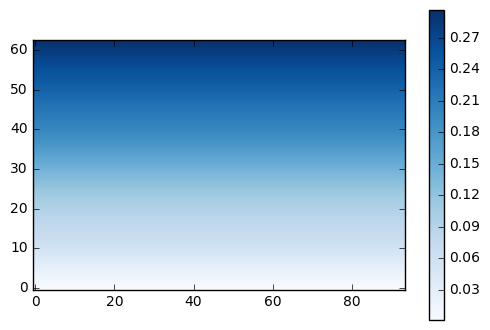

In [76]:
## get cell center values:
xcc  = np.zeros([ncol+2, nrow+2])    
ycc  = np.zeros([ncol+2, nrow+2])
zcc  = np.zeros([ncol+2, nrow+2])

for j in range(ncol+1):
    for k in range( nrow+1):
        n1 = nop[j, k, 0] 
        n2 = nop[j, k, 1]       
        n3 = nop[j, k, 2]        
        n4 = nop[j, k, 3]  
        xcc[j,k] = 0.25*(x[n1] + x[n2] + x[n3] + x[n4])  
        ycc[j,k] = 0.25*(y[n1] + y[n2] + y[n3] + y[n4])
        zcc[j,k] = 0.25*(z[n1] + z[n2] + z[n3] + z[n4])        
        
plt.imshow(zcc[1:-1, 1:-1].T, cmap = "Blues", origin = "lower")
plt.colorbar()
